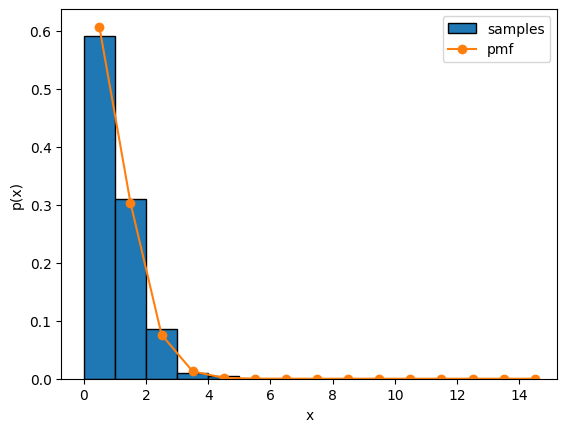

In [4]:
import torch
from torch.distributions import Poisson
import matplotlib.pyplot as plt

# Construct a Poisson distribution with rate 5.0 and draw 1000 samples
rate = 0.5
pois = Poisson(rate)
xs = pois.sample(sample_shape=(1000,))

# Plot a histogram of the samples and overlay the pmf
bins = torch.arange(15)
plt.hist(xs, bins, density=True, edgecolor='k', label='samples')
plt.plot(bins + .5, torch.exp(pois.log_prob(bins)), '-o', label='pmf')
plt.xlabel("x")
plt.ylabel("p(x)")
_ = plt.legend()

In [8]:
import numpy as np

# Function to perform MLE for Bernoulli parameter p
def bernoulli_mle(x):
    """
    Perform Maximum Likelihood Estimation (MLE) for the Bernoulli parameter p.
    
    Parameters:
    x (array-like): Observations from the Bernoulli distribution, 0s and 1s.

    Returns:
    float: The MLE estimate of the Bernoulli parameter p.
    """
    # Compute the number of observations
    n = len(x)
    
    # Compute the sum of successes (sum of 1's in the data)
    success_count = np.sum(x)
    
    # MLE for Bernoulli parameter p is the proportion of successes
    p_mle = success_count / n
    
    return p_mle

# Example usage
data = [1]*14+[0]*3  # Example Bernoulli trial data
p_hat = bernoulli_mle(data)
print(f"The MLE estimate of p is: {p_hat:.4f}")

import numpy as np
import scipy.stats as st

# Function to compute the 95% confidence interval for Bernoulli parameter p
def bernoulli_confidence_interval(x, confidence=0.95):
    """
    Compute the confidence interval for the Bernoulli parameter p.
    
    Parameters:
    x (array-like): Observations from the Bernoulli distribution, 0s and 1s.
    confidence (float): The confidence level for the interval (default is 0.95).
    
    Returns:
    tuple: The lower and upper bounds of the confidence interval.
    """
    # Compute the number of observations
    n = len(x)
    
    # Compute the MLE estimate of p
    p_hat = np.sum(x) / n
    
    # Critical value for the normal distribution
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    print(1 - (1 - confidence) / 2)
    print(z)
    
    # Standard error of p_hat
    se = np.sqrt(p_hat * (1 - p_hat) / n)
    
    # Compute the confidence interval
    ci_lower = p_hat - z * se
    ci_upper = p_hat + z * se
    
    return ci_lower, ci_upper

# Example usage
data = [1]*14+[0]*3  # Example Bernoulli trial data
p_hat = bernoulli_mle(data)
ci_lower, ci_upper = bernoulli_confidence_interval(data)

print(f"MLE estimate of p: {p_hat:.4f}")
print(f"95% confidence interval for p: [{ci_lower:.4f}, {ci_upper:.4f}]")



The MLE estimate of p is: 0.8235
0.975
1.959963984540054
MLE estimate of p: 0.8235
95% confidence interval for p: [0.6423, 1.0047]


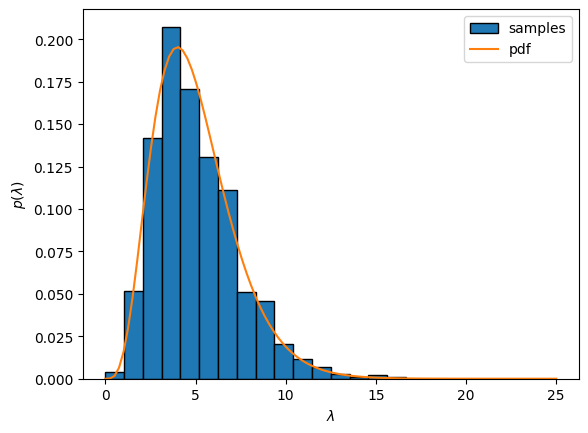

In [13]:
import torch
from torch.distributions import Gamma
import matplotlib.pyplot as plt

# Construct a gamma distribution 
alpha = 5.0
beta = 10.0/10.0
gam = Gamma(alpha, beta)
lambdas = gam.sample(sample_shape=(1000,))

# Plot a histogram of the samples and overlay the pmf
grid = torch.linspace(0, 25, 100)
bins = torch.linspace(0, 25, 25)
plt.hist(lambdas, bins, density=True, edgecolor='k', label='samples')
plt.plot(grid, torch.exp(gam.log_prob(grid)), '-', label='pdf')
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$p(\lambda)$")
_ = plt.legend()

In [15]:
import numpy as np
from scipy.optimize import minimize

# Negative log-likelihood function for Bernoulli distribution
def neg_log_likelihood(p, x):
    """
    Compute the negative log-likelihood for a Bernoulli distribution.
    
    Parameters:
    p (float): The Bernoulli parameter (probability of success).
    x (array-like): Observations from the Bernoulli distribution, 0s and 1s.
    
    Returns:
    float: The negative log-likelihood value.
    """
    # Ensure p is in the valid range (0, 1)
    if p <= 0 or p >= 1:
        return np.inf
    
    # Compute the log-likelihood
    n = len(x)
    S = np.sum(x)  # Total number of successes (sum of 1's in the data)
    
    # Log-likelihood for Bernoulli: S * log(p) + (n - S) * log(1 - p)
    log_likelihood = S * np.log(p) + (n - S) * np.log(1 - p)
    
    # Return the negative log-likelihood (since we want to minimize it)
    return -log_likelihood

# Function to fit the Bernoulli parameter p using an optimizer
def fit_bernoulli_mle(x):
    """
    Fit the Bernoulli parameter p using MLE with numerical optimization.
    
    Parameters:
    x (array-like): Observations from the Bernoulli distribution, 0s and 1s.
    
    Returns:
    float: The MLE estimate of the Bernoulli parameter p.
    """
    # Initial guess for p (start at 0.5)
    initial_guess = 0.5
    
    # Use scipy's minimize function to minimize the negative log-likelihood
    result = minimize(neg_log_likelihood, initial_guess, args=(x,), bounds=[(0.0001, 0.9999)])
    
    # Extract the optimal p value
    p_mle = result.x[0]
    print(result)
    
    return p_mle

# Example usage
data = [1]*14+[0]*3  # Example Bernoulli trial data
p_hat_optimized = fit_bernoulli_mle(data)

print(f"The MLE estimate of p using optimization is: {p_hat_optimized:.4f}")


  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 7.92198736833773
        x: [ 8.235e-01]
      nit: 7
      jac: [-6.217e-07]
     nfev: 18
     njev: 9
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
The MLE estimate of p using optimization is: 0.8235


In [20]:
from scipy.optimize import minimize

result = minimize(lambda x: (1/3)*x**3 - x**2 - 3*x + 10, x0=0, bounds=[(-4, 4)])


In [21]:
result

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 1.0000000000000089
        x: [ 3.000e+00]
      nit: 1
      jac: [ 3.553e-07]
     nfev: 4
     njev: 2
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

In [22]:
from scipy.optimize import minimize

# Define the function to minimize
def func(x):
    return (1/3)*x**3 - x**2 - 3*x + 10

# Try different starting points
starting_points = [-4, -2, 0, 2, 4]  # Example starting points
results = []

for x0 in starting_points:
    result = minimize(func, x0=x0, bounds=[(-4, 4)])
    results.append(result)

# Print the found minimizing points
for res in results:
    print(f"Starting point: {res.x}, Minimum value: {res.fun}, Success: {res.success}")


Starting point: [-4.], Minimum value: -15.333333333333329, Success: True
Starting point: [-4.], Minimum value: -15.333333333333329, Success: True
Starting point: [3.00000007], Minimum value: 1.0000000000000089, Success: True
Starting point: [2.99999914], Minimum value: 1.0000000000014708, Success: True
Starting point: [2.99999999], Minimum value: 1.0, Success: True


In [23]:
import math
import cmath  # For handling complex roots

# Coefficients of the quadratic equation ax^2 + bx + c = 0
a = 1
b = -2
c = -3

# Calculate the discriminant
discriminant = b**2 - 4*a*c

# Check if the discriminant is positive, zero, or negative
if discriminant > 0:
    # Two distinct real roots
    root1 = (-b + math.sqrt(discriminant)) / (2*a)
    root2 = (-b - math.sqrt(discriminant)) / (2*a)
    print("The equation has two distinct real roots:")
    print(f"Root 1 = {root1}")
    print(f"Root 2 = {root2}")
elif discriminant == 0:
    # One real root (double root)
    root = -b / (2*a)
    print("The equation has one real root (a double root):")
    print(f"Root = {root}")
else:
    # Two complex roots
    root1 = (-b + cmath.sqrt(discriminant)) / (2*a)
    root2 = (-b - cmath.sqrt(discriminant)) / (2*a)
    print("The equation has two complex roots:")
    print(f"Root 1 = {root1}")
    print(f"Root 2 = {root2}")


The equation has two distinct real roots:
Root 1 = 3.0
Root 2 = -1.0


In [28]:
f=lambda x: (1/3)*x**3 - x**2 - 3*x + 10

print(f(-1))
print(f(3))
print(f(-4))
print(f(4))

11.666666666666666
1.0
-15.333333333333329
3.333333333333332


In [43]:
from scipy.optimize import minimize
import math

# Define the function to minimize
def func(x):
    return -(abs(x+1)-2*x**2)

# Try different starting points
starting_points = [0.5]  # Example starting points
results = []

for x0 in starting_points:
    result = minimize(func, x0=x0, bounds=[(-2, 2)])
    results.append(result)

# Print the found minimizing points
for res in results:
    print(f"Starting point: {res.x}, Minimum value: {res.fun}, Success: {res.x}")
print(result)


Starting point: [0.25], Minimum value: -1.125, Success: [0.25]
  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -1.125
        x: [ 2.500e-01]
      nit: 1
      jac: [ 2.220e-08]
     nfev: 6
     njev: 3
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>


In [35]:
math.log(2)/3

0.23104906018664842

In [44]:
import sympy as sp

# Define the symbols
n, tau, S = sp.symbols('n tau S')

# Define the expression
expr = n * sp.log(sp.sqrt(2 * sp.pi * tau)) - (1 / (2 * tau)) * S

# Differentiate the expression with respect to tau
diff_expr = sp.diff(expr, tau)

# Display the result
diff_expr


S/(2*tau**2) + n/(2*tau)

In [1]:
import numpy as np
from scipy.stats import norm

# Define the mean and variance (sigma^2)
mean = 1
variance = 2
std_dev = np.sqrt(variance)  # standard deviation

# Create a normal distribution object
dist = norm(loc=mean, scale=std_dev)

# Probability that a random variable X ~ N(1, 2) lies between 0.5 and 2
prob = dist.cdf(2) - dist.cdf(0.5)

print("Probability from 0.5 to 2:", prob)
    

Probability from 0.5 to 2: 0.3984131339906417
